<a href="https://colab.research.google.com/github/prikshit-2000/Tensorflow/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os
SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  # new flag present in tf 2.0+
random.seed(SEED)
np.random.seed(SEED)
tf.compat.v2.random.set_seed(SEED)
from tensorflow.keras.utils import plot_model

In [20]:
def generate_dataset(m):
    """
    Plots m random points on a 3D plane
    """

    angles = np.random.rand(m) * 3 * np.pi /2 - 0.5
    data = np.empty((m,3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:,1] = np.sin(angles) + 0.7 + 0.1 * np.random.randn(m)/2
    data[:,2] = data[:,0] *0.1 + data[:,1] * 0.3 + 0.1 * np.random.randn(m)
    return data


In [21]:
X_train = generate_dataset(100)
X_train  = X_train - X_train.mean(axis = 0 , keepdims = 0)
# X_train


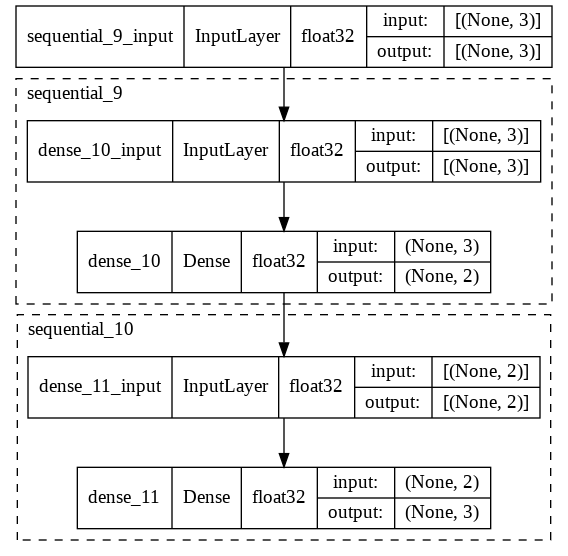

In [37]:
plot_model(autoencoder,show_shapes=True,show_dtype = True,show_layer_activations=True,expand_nested=True)

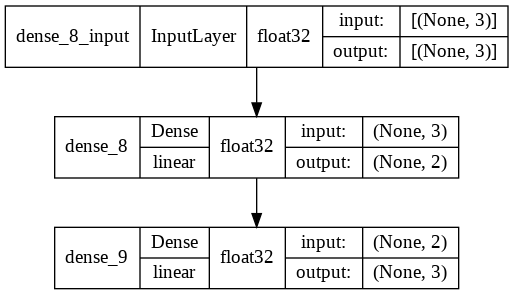

In [39]:
plot_model(model,show_shapes=True,show_dtype = True,show_layer_activations=True,expand_nested=True)

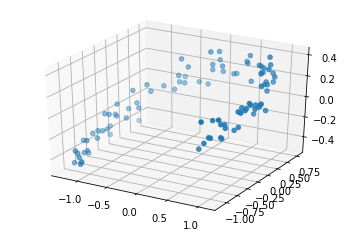

In [22]:
ax = plt.axes(projection = '3d')
ax.scatter3D(X_train[:,0] , X_train[:,1],X_train[:,2],cmap= 'reds');

In [23]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(2,input_shape = [3]),
                                    tf.keras.layers.Dense(3)
])

In [24]:
encoder = tf.keras.models.Sequential([tf.keras.layers.Dense(2,input_shape = [3])])
decoder = tf.keras.models.Sequential([tf.keras.layers.Dense(3,input_shape = [2])])
autoencoder = tf.keras.models.Sequential([encoder,decoder])

In [25]:
autoencoder.compile(loss = 'mse',optimizer='sgd')
model.compile(loss = 'mse',optimizer='sgd')

In [26]:
history   = autoencoder.fit(X_train,X_train,epochs = 10)
history_2 = model.fit(X_train,X_train,epochs = 10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 0.3014
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2986
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2961
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2930
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2901
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2869
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2835
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2810
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2782
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2756
Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 0.3903
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.3842
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.378

input point: [0.65499286 0.68534674 0.27967982]
encoded point: [-0.30564892 -0.19532542]


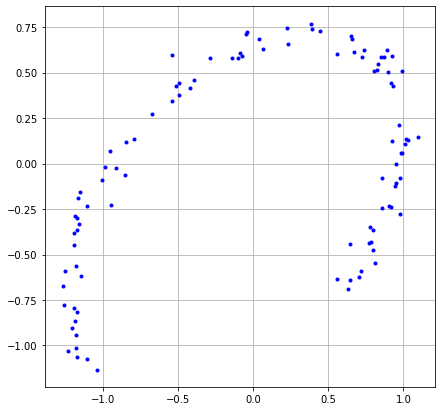

In [29]:
codings = encoder.predict(X_train)
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

plt.figure(figsize=(7,7))
plt.plot(X_train[:,0],X_train[:,1],"b.")
plt.grid(True)
plt.show()


input point: [0.65499286 0.68534674 0.27967982]
encoded point: [-0.30564892 -0.19532542]
decoded point: [-0.14274597  0.19975238 -0.00624372]


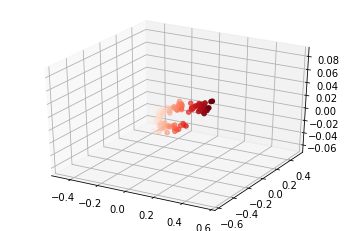

In [30]:
decoded = decoder.predict(codings)
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decoded[0]}')

ax = plt.axes(projection = '3d')
ax.scatter3D(decoded[:,0],decoded[:,1],decoded[:,2],c=decoded[:, 0],cmap = 'Reds')

input point: [0.65499286 0.68534674 0.27967982]
encoded point: [-0.30564892 -0.19532542]
decoded point: [-0.05482363  0.00524479 -0.14479445]


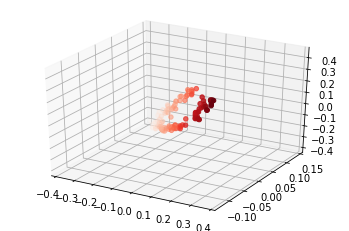

In [32]:
preds = model.predict(X_train)
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {preds[0]}')

ax = plt.axes(projection = '3d')
ax.scatter3D(preds[:,0],preds[:,1],preds[:,2],c = preds[:, 0],cmap = 'Reds')